# 乳癌資料庫預測SVM分類
>使用scikit-learn 機器學習套件裡的SVR演算法

* (一)引入函式庫及內建乳癌資料集<br>
引入之函式庫如下<br>
sklearn.datasets: 用來匯入內建之乳癌資料集`datasets.load_breast_cancer()`<br>
sklearn.SVR: 支持向量機回歸分析之演算法<br>
matplotlib.pyplot: 用來繪製影像

In [1]:
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Step1. 下載資料

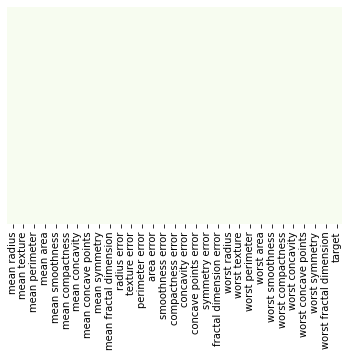

In [2]:
breast_cancer = datasets.load_breast_cancer()
target_names = breast_cancer["target_names"]
feature_names = breast_cancer["feature_names"]
data = breast_cancer["data"]
target = breast_cancer["target"]

# Checking if data missing
df = pd.DataFrame(np.c_[data, target],
                  columns=np.append(feature_names, ["target"]))

sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="GnBu")
plt.show()

## Step2. 區分訓練集與測試集

In [3]:
x_train, x_test, y_train, y_test = \
    train_test_split(
        data, target, test_size=0.2)

## Step3. 建模、預測及調參

In [4]:
C_list = [0.1, 1, 10, 100]
gamma_list = [0.003, 0.03, 0.3, 1]

scores = []
params = []
for c in C_list:
    for gamma in gamma_list:
        model = svm.SVC(kernel='rbf', C=c, gamma=gamma)
        model.fit(x_train, y_train)
        # Score = 1.0 - MSE
        score = model.score(x_test, y_test)
        scores.append(score)
        params.append((c, gamma))

best_score = max(scores)
best_params = params[scores.index(best_score)]

print(f"The best testing score is {best_score:<.2f}")
print(f"with parameters : C = {best_params[0]}, gamma = {best_params[1]}")

The best testing score is 0.91
with parameters : C = 10, gamma = 0.003
